In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (z : trial_type)
#### Load data and check data head
##### Use anxious.csv

In [41]:
# Load data from csv file into a NumPy structured array
dataCon = hddm.load_csv('./rt_dataframes/control.csv')
dataCon.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [42]:
dataCon = dataCon.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataCon['rt'] = dataCon['rt']/1000
dataCon.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


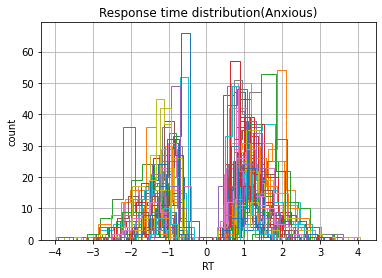

In [43]:
#flip the error RTs to be negative
dataCon = hddm.utils.flip_errors(dataCon)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(Anxious)')
for i, subj_data in dataCon.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM4C/rt_distribution(anx).png')

## Fitting the hierarchical model for one condition with no subject effects for Anxious participants

In [44]:
m = hddm.HDDM(dataCon,depends_on={'z': 'trial_type', 'v':'trial_type'}, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(4000, burn=1000, dbname='./fitting_results/HDDM/HDDM4C/traces(2CAnx_z)', db='pickle')
m.save('./fitting_results/HDDM/HDDM4C/model(2CAnx_z)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 4000 of 4000 complete in 1385.8 sec

Plotting a
Plotting a_std
Plotting v(101)
Plotting v(102)
Plotting v_std
Plotting t
Plotting t_std
Plotting z(101)
Plotting z(102)
Plotting z_std


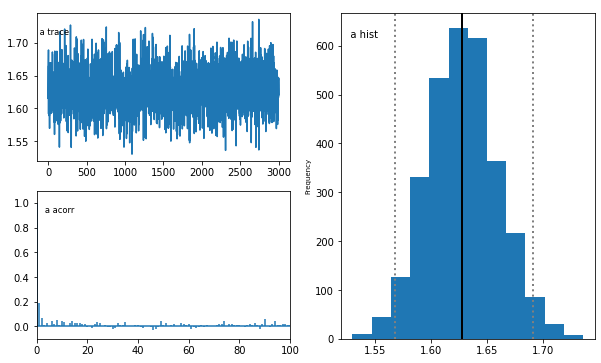

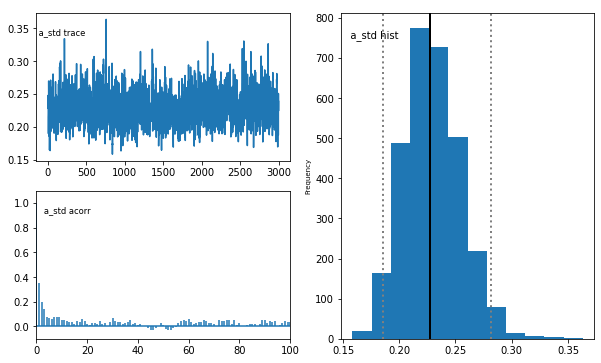

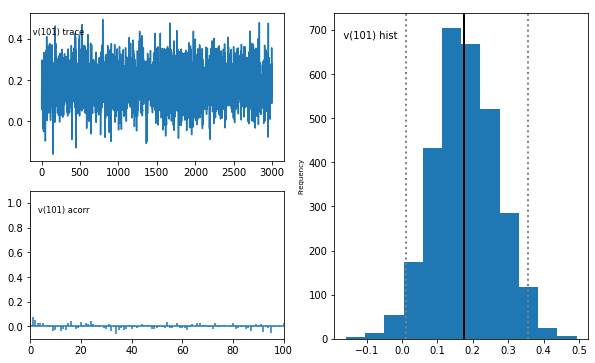

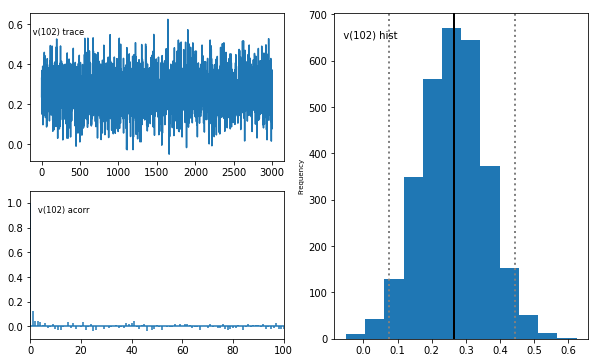

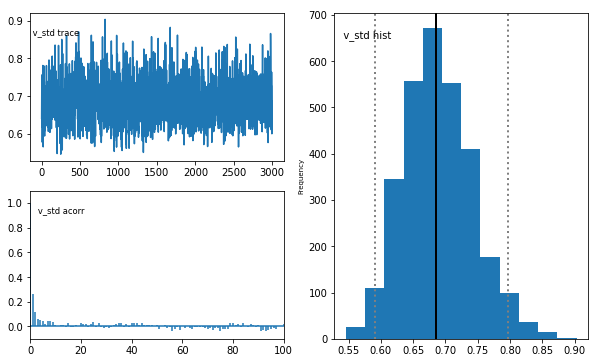

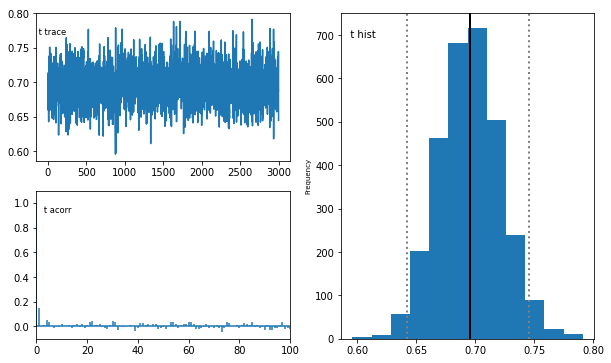

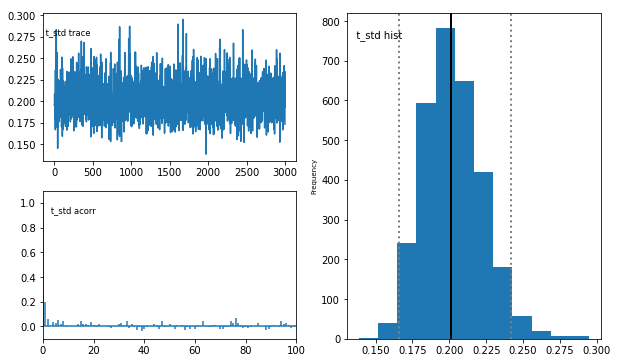

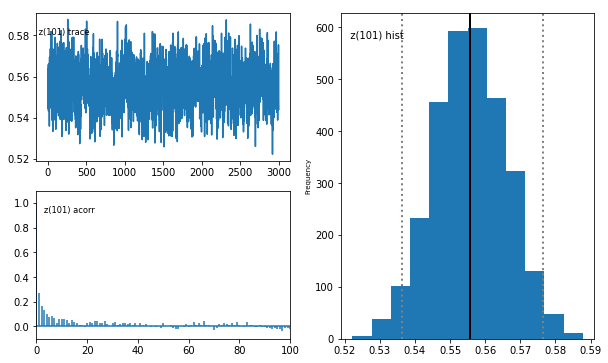

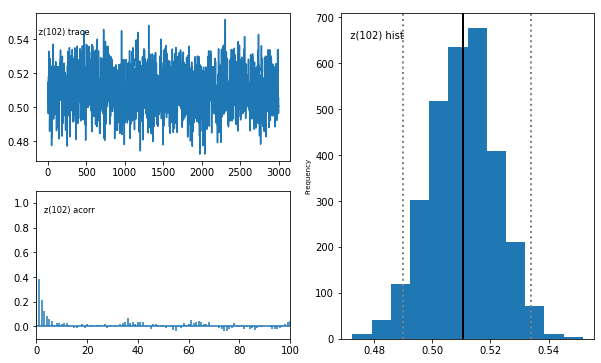

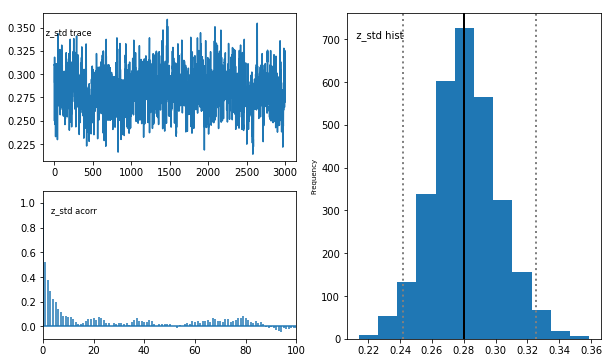

In [45]:
# plot posteriors
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [46]:
stats4Cz = m.gen_stats()
stats4Cz.to_csv('./fitting_results/HDDM/HDDM4C/HDDM4CCon_z.csv', sep=',')
stats4Cz[stats4Cz.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.62857,0.0311505,1.56841,1.60748,1.62804,1.64817,1.69202,0.000816557
a_std,0.229223,0.0252297,0.185226,0.211359,0.227477,0.245657,0.281113,0.000879456
v_std,0.688891,0.0535752,0.594011,0.651426,0.685095,0.723896,0.804254,0.00149253
t,0.695678,0.0263607,0.645381,0.677875,0.695538,0.712536,0.749039,0.000619459
t_std,0.202442,0.0201123,0.167258,0.188491,0.200979,0.215344,0.246064,0.000507358
z_std,0.281008,0.0208923,0.240654,0.26732,0.280145,0.294087,0.324753,0.000811796


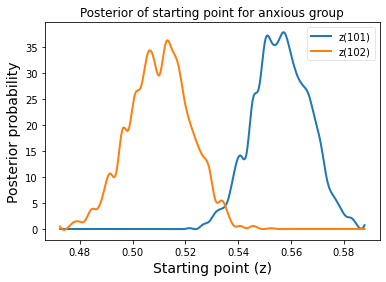

In [50]:
z_101, z_102 = m.nodes_db.node[['z(101)', 'z(102)']]
z_101_trace, z_102_trace = m.nodes_db.node[['z(101)', 'z(102)']]
hddm.analyze.plot_posterior_nodes([z_101, z_102])
plt.xlabel('Starting point (z)', fontsize = 14)
plt.ylabel('Posterior probability', fontsize = 14)
plt.title('Posterior of starting point for anxious group', fontsize = 12)
plt.savefig('./fitting_results/HDDM/HDDM4C/posterior_zCon(101,102).png')

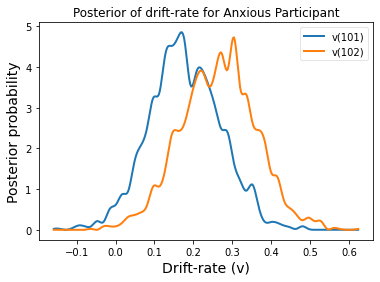

In [51]:
v_101, v_102 = m.nodes_db.node[['v(101)', 'v(102)']]
hddm.analyze.plot_posterior_nodes([v_101, v_102])
plt.xlabel('Drift-rate (v)', fontsize=14)
plt.ylabel('Posterior probability', fontsize=14)
plt.title('Posterior of drift-rate for Anxious Participant', fontsize=12)
plt.savefig('./fitting_results/HDDM/HDDM4C/posterior_vCon(101,102).png')

In [49]:
m.dic

16117.365606589206

## Check for model convergence

In [52]:
# Set up models list to append results
models2CzCon = list()

In [53]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,depends_on={'z': 'trial_type', 'v':'trial_type'},include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(4000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM4C/chain4Cz_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM4C/chain4CzCon_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [54]:
num_chains = 5
data_chains = [(dataCon,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models2CzCon = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 0Fitting chain 1

Fitting chain 2Fitting chain 3

Fitting chain 4


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------98%----------------- ] 3922 of 4000 complete in 1372.9 sec              0%                  ] 3 of 4000 complete in 0.8 sec[                  0%                  ] 3 of 4000 complete in 0.8 sec [                  0%                  ] 3 of 4000 complete in 0.9 sec[                  0%                  ] 5 of 4000 complete in 1.6 sec[                  0%                  ] 5 of 4000 complete in 1.6 sec[                  0%                  ] 5 of 4000 complete in 1.6 sec [                  0%                  ] 5 of 4000 complete in 1.7 sec[                  0%                  ] 7 of 4000 complete in 2.3 sec[                  0%                  ] 7 of 4000 complete in 2.3 sec[                  0%                  ] 7 of 4000 complete in 2.3 sec[                  0%                  ] 7 of 4000 complete in 2.4 sec[                  0%                  ] 7 of 4000 complete in 2.4 sec[                  0%                  ] 9 of 4000 complete in 3.0 sec[                

In [55]:
models2CzCon

In [56]:
results = hddm.analyze.gelman_rubin(models2CzCon)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.0040832230017187
a_std: 1.0099145218528163
a_subj.02535fcf7e16bb56: 1.0066706680510844
a_subj.09ba82a2ca814481: 1.0012668170505998
a_subj.0abfc32a4d12c731: 1.000362360931873
a_subj.0b0a94c202d0b233: 0.9998660644561779
a_subj.0d894551bc966608: 1.000092953190011
a_subj.15e0c065b2c11595: 0.9999982166970456
a_subj.163b12703c8e5c3c: 0.9999980905569029
a_subj.1bf86ff948486447: 1.000720815203326
a_subj.1cb976bac3a2016b: 0.9999522205995007
a_subj.22d84796012679e8: 1.0001947602705135
a_subj.247384e4eccc4f80: 1.0004247679731146
a_subj.27902f23b60a7b76: 1.734900370163964
a_subj.296a71628065dfa8: 1.2360336615383642
a_subj.371fb6652968f25f: 1.0007921170068594
a_subj.3ddf191ed8c33c57: 1.000265325696045
a_subj.414f1040212a659b: 1.0004191642166507
a_subj.46fd6e0b3b5c1df3: 1.0000385244607792
a_subj.4866612e834a9f5a: 1.0006723310064713
a_subj.4a43f99c56b2a634: 0.9999513860797995
a_subj.4e3de1ed1c0d6103: 1.0004013193297767
a_subj.5497867d4afb5993: 0.9999456671446968
a_subj.582ab220066afebc: 0.999888

In [57]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{'a_subj.27902f23b60a7b76': 1.734900370163964, 'a_subj.296a71628065dfa8': 1.2360336615383642, 't_subj.27902f23b60a7b76': 2.1842370662809607, 't_subj.296a71628065dfa8': 1.3056818702920685, 'z_subj_trans(101).27902f23b60a7b76': 1.3670898034009034, 'z_subj_trans(102).296a71628065dfa8': 1.2454381180804075}

Values smaller than the threshold:
{}


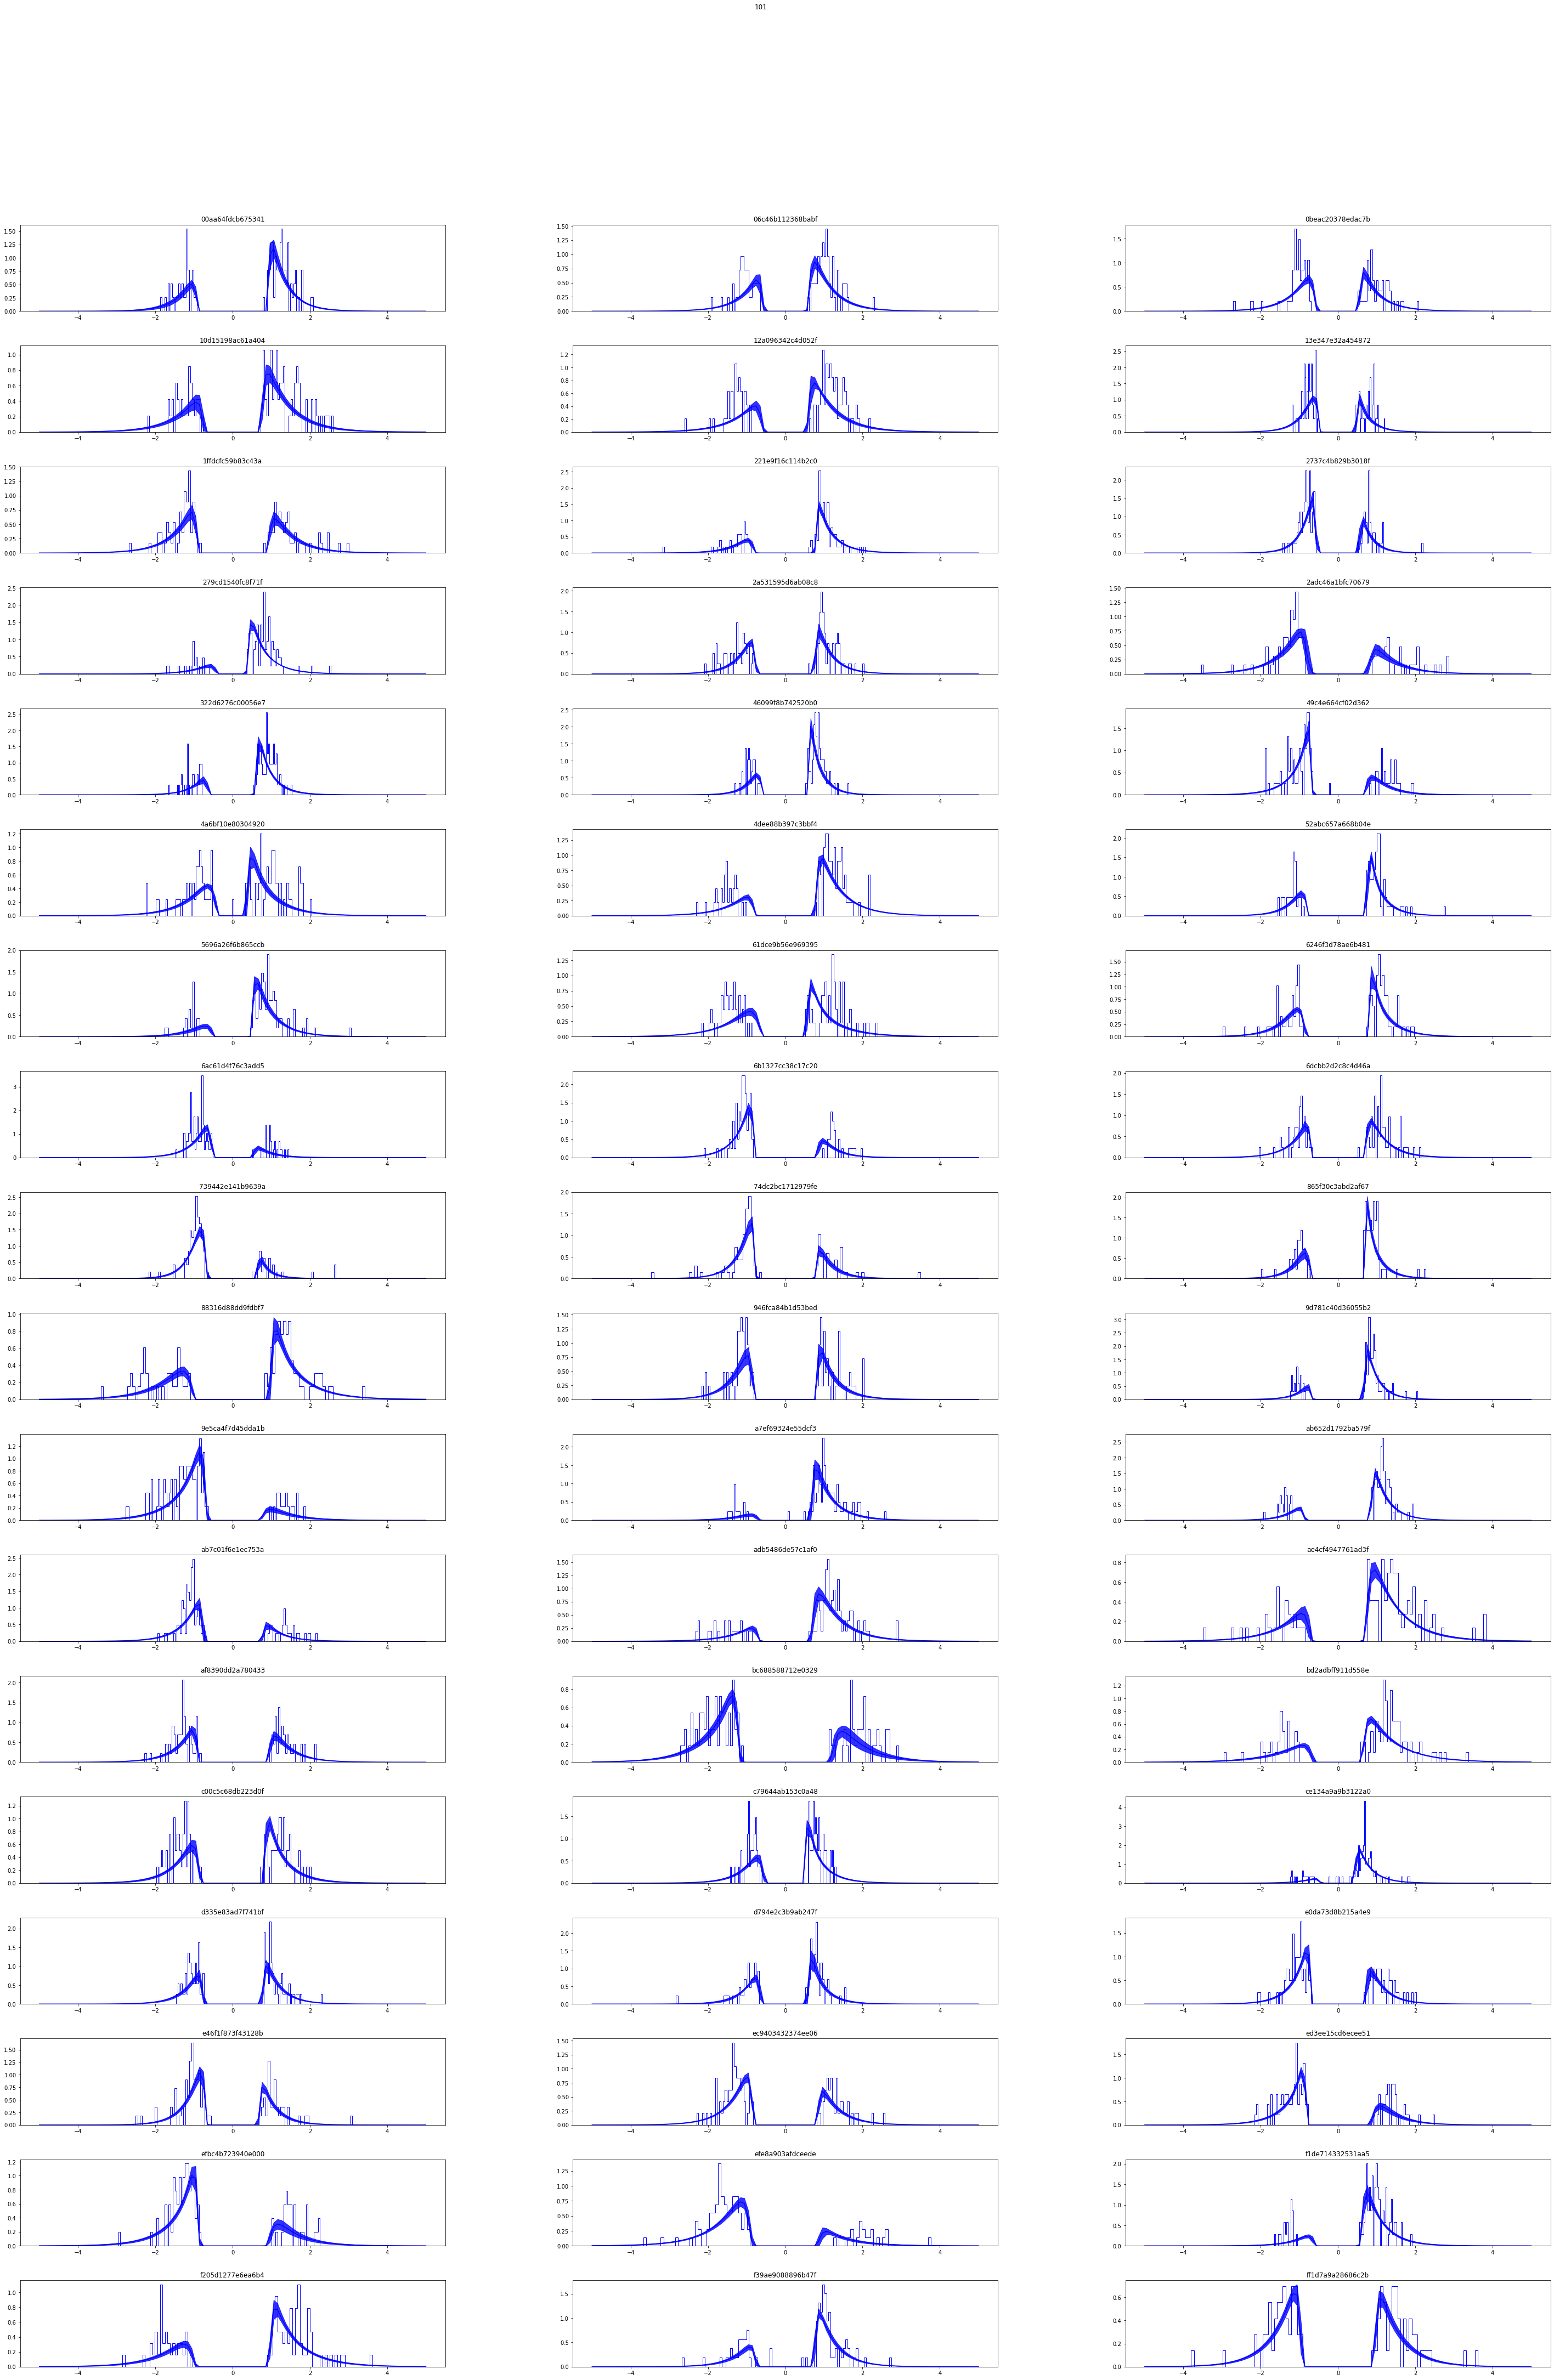

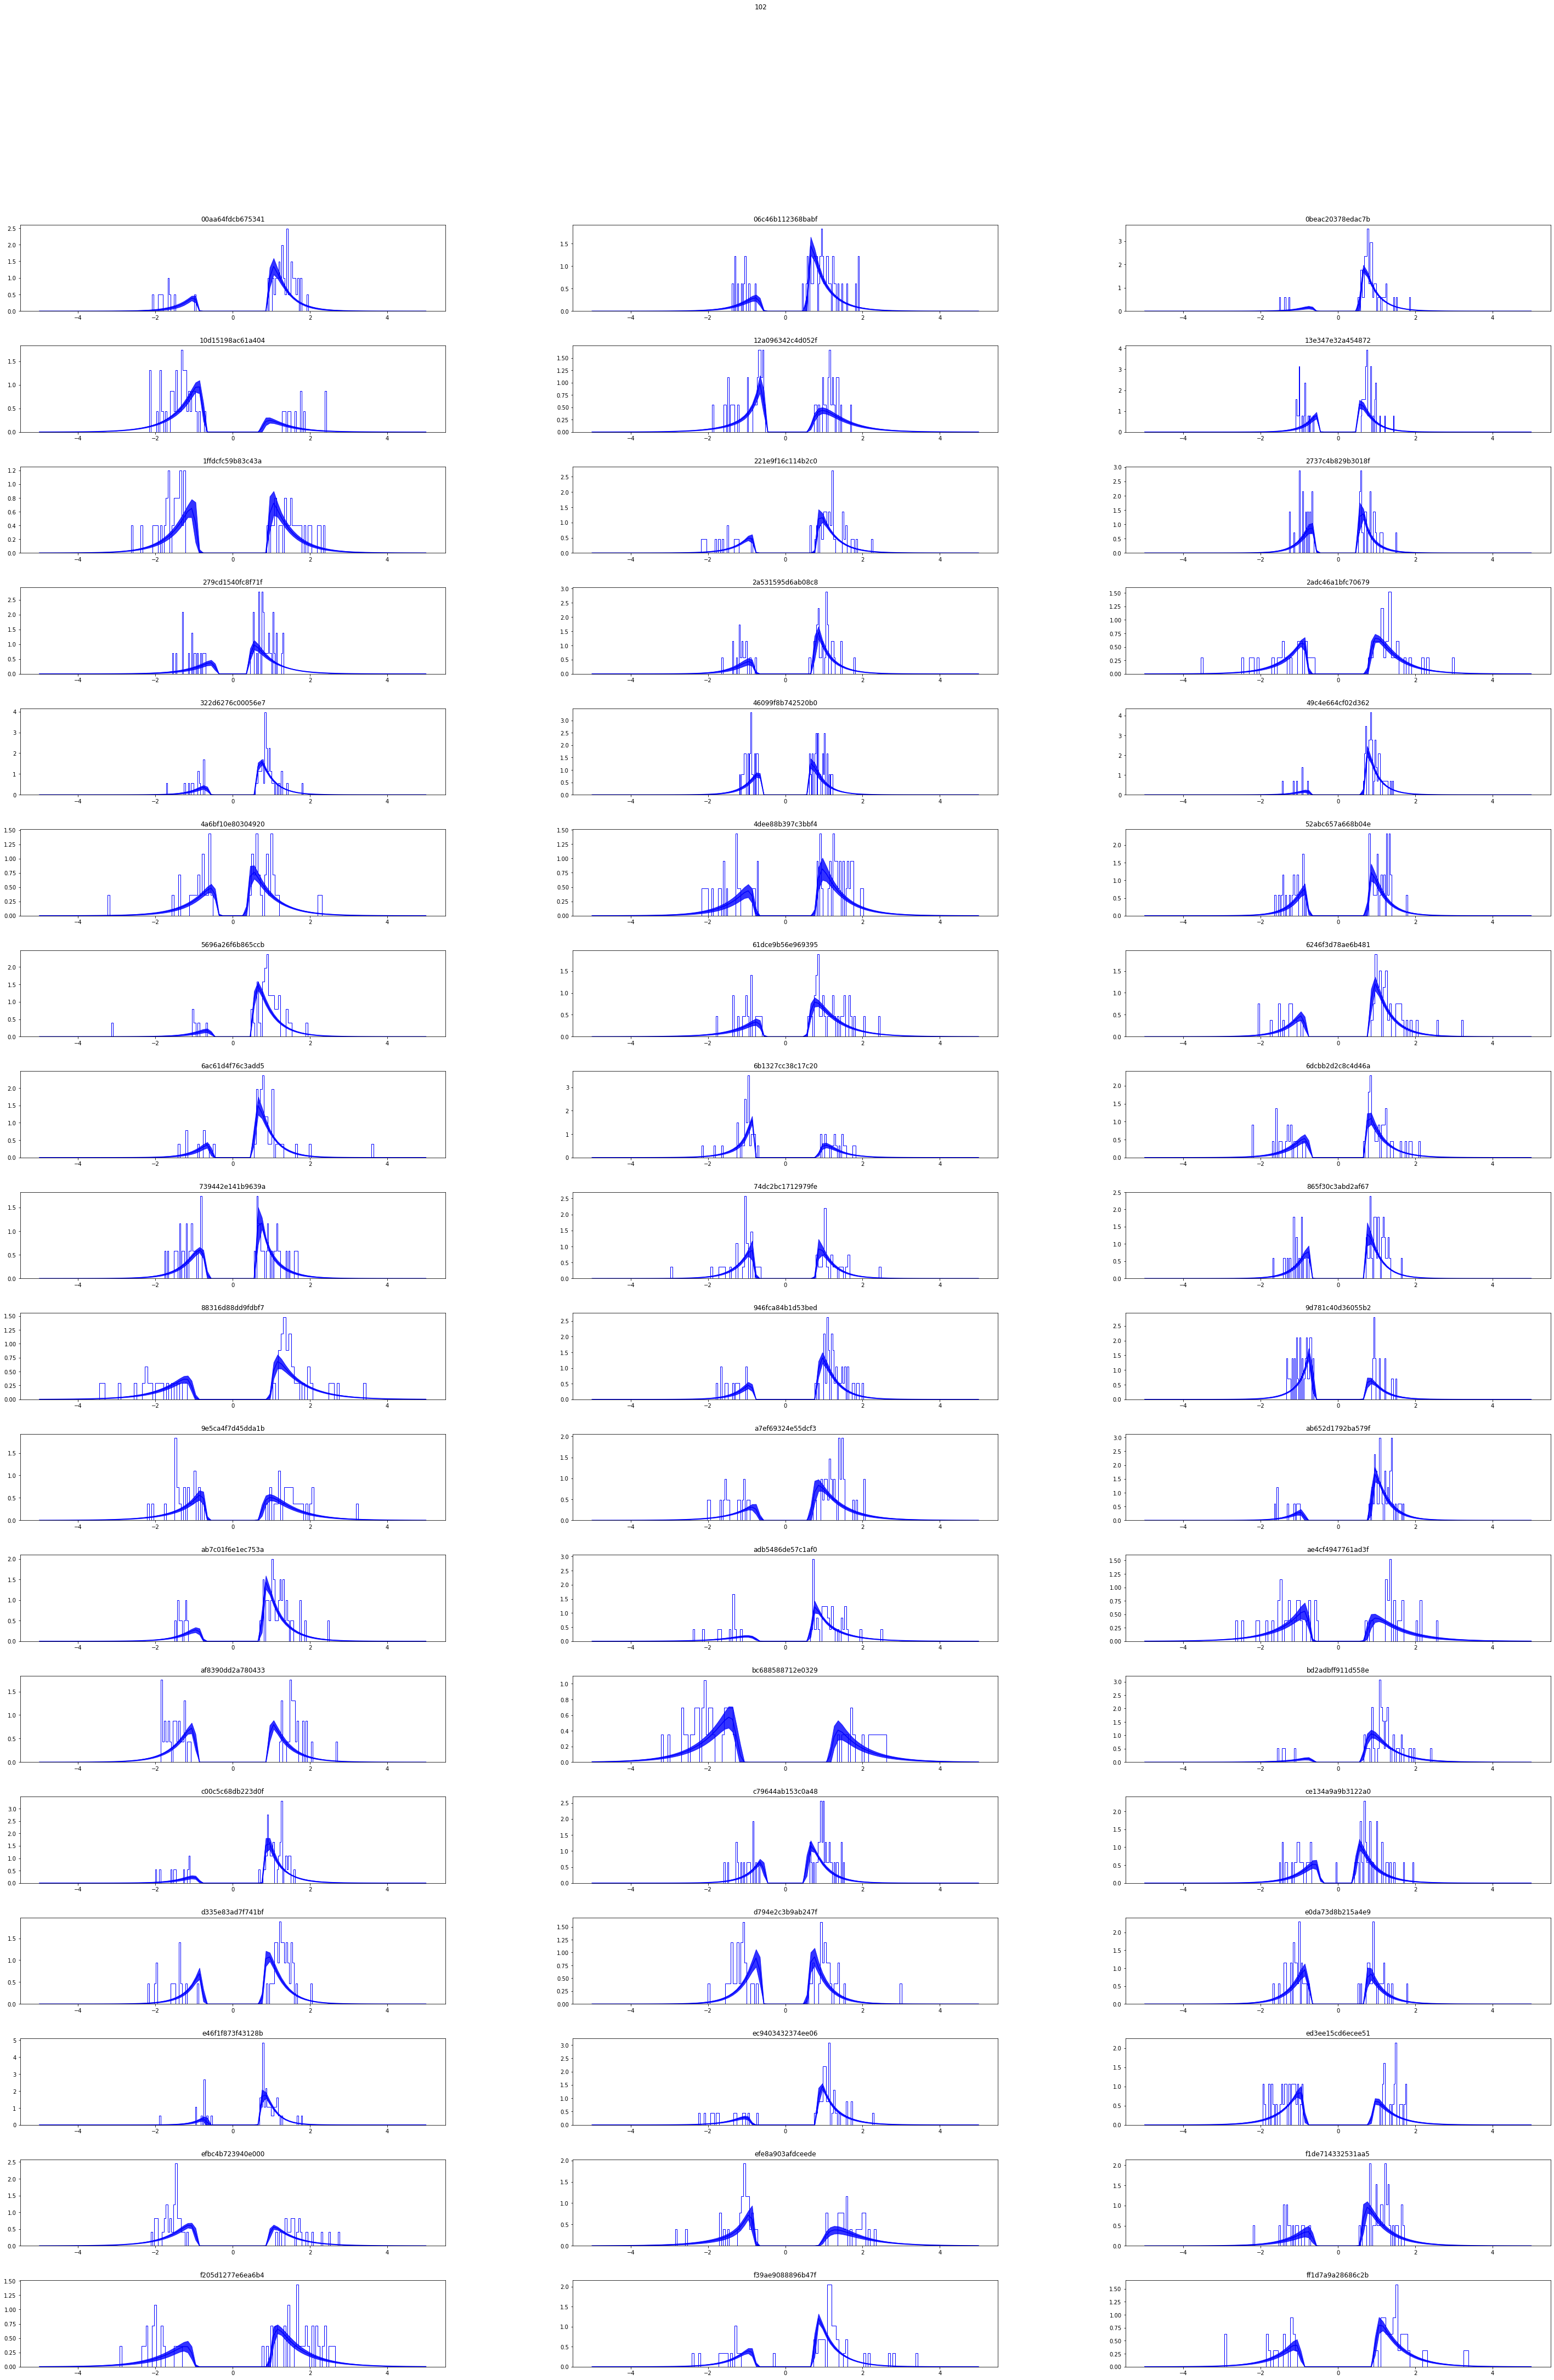

In [ ]:
m.plot_posterior_predictive(figsize=(50, 70))